# Data normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.data')
print(df.head())

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [3]:
print(df.shape)

(32560, 15)


In [4]:
names = list(df.columns)
print(names)

['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


 <=50K
 <=50K    24719
 >50K      7841
Name: count, dtype: int64


<Axes: xlabel=' <=50K'>

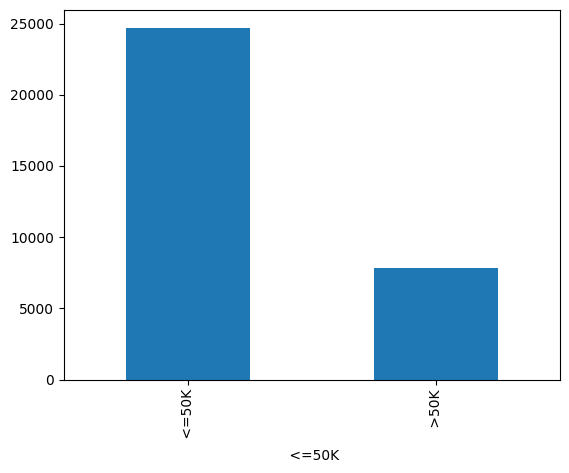

In [5]:
g = df[names[-1]].value_counts()
print(g)
g.plot.bar()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a = ['lan','lan','hung','diep']
le.fit_transform(a)
c = ['hung', 'diep']
b = le.transform(c)
print(b)

[1 0]


In [7]:
types = df.dtypes
types

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])

C:\Users\An\AppData\Local\Temp\ipykernel_9604\157203406.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\An\AppData\Local\Temp\ipykernel_9604\157203406.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\An\AppData\Local\Temp\ipykernel_9604\157203406.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\An\AppData\Local\Temp\ipykernel_96

In [9]:
data = df.values
print(data[:2])

[[    50      6  83311      9     13      2      4      0      4      1
       0      0     13     39      0]
 [    38      4 215646     11      9      0      6      1      4      1
       0      0     40     39      0]]


In [10]:
x = data[:,:-1]
y = data[:,-1]
print(x.shape)
print(y.shape)

(32560, 14)
(32560,)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
print(X_scaled[0])

[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state = 42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [14]:
# prediction
y_pred = kNN.predict(X_test)

In [15]:
# error
err = 0
for i in range(len(X_test)):
    if y_test[i] != y_pred[i]:
        err +=1
print(err)

1571


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5476  681]
 [ 890 1093]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      6157
           1       0.62      0.55      0.58      1983

    accuracy                           0.81      8140
   macro avg       0.74      0.72      0.73      8140
weighted avg       0.80      0.81      0.80      8140

